# Módulo: Aprendizaje No Supervisado
## Métodos de agrupamiento

# Introducción

<center>
    <img src="figures/sup-unsup-1.png" width="800"/>
</center>

Las tareas de agrupamiento son "similares" a las tareas de clasificación, pero sin especificar las clases verdaderas a las que pertenecen cada observación $(\mathbf{X}, \mathbf{y})$

Los algoritmos de agrupamiento buscan "patrones" o "similitudes" entre las observaciones, de tal modo de agrupar observaciones "parecidas"

<br><center>
    <img src="figures/intro-cluster-1.jpg" width="800"/>
</center>

Los algoritmos de agrupamiento entregan predicciones "ciegas". Esto significa que las predicciones de las clases son valores $\{0, 1, 2, ... \}$, sin saber _a priori_ a qué corresponde cada predicción.

La interpretación de qué "clase" u objeto corresponde a cada predicción es tarea del analista.

<center>
    <img src="figures/intro-cluster-3.jpg" width="600"/>
</center>

# K-medias (K-means)

## Generalidades
El método se basa en agrupar $n$ observaciones en un total pre-definido de $k$ grupos (clusters).

Los grupos son tal que la suma de distancias al cuadrado entre los centroides y las observaciones dentro del grupo es mínima.

<center>
    <img src="figures/k-means-1.png" width="800"/>
</center>

Esta suma de distancias se conoce como "inercia" del grupo.


El criterio de la inercia asume que los grupos son convexos e isotrópicos, por lo que puede funcionar mal para ciertos casos.

<center>
    <img src="figures/k-means-2.png" width="500"/>
</center>

Lo mismo puede ocurrir para una dimensión del set de datos demasiado alta (cantidad de atributos).

## Formulación
Dadas las observaciones $\mathbf{x}_{1}, \mathbf{x}_{2}, ..., \mathbf{x}_n$ se busca encontrar grupos $\mathbf{S} = S_{1}, S_{2}, ..., S_{k}$ tales que:
\begin{split}
    \operatorname*{argmin}_\mathbf{S} \sum_{i=1}^{k} \sum_{\mathbf{x}_{j} \in S_{i}} \| \mathbf{x}_{j} - \mathbf{\mu}_{i} \|^2
\end{split}
en donde $\mathbf{\mu}_{i}$ es la media (o centroide) del grupo $S_{i}$

Esto es equivalente a minimizar la varianza dentro del grupo expresado como sigue:
\begin{split}
    \operatorname*{argmin}_\mathbf{S} \sum_{i=1}^{k} |S_{i}| \text{Var}(S_{i})
\end{split}

## Algoritmo estándar
- Inicialmente se definen $k$ muestras del conjunto como centroides, por ejemplo, de manera aleatoria.
- **Paso 1**: cada muestra se asigna al grupo del centroide más cercano.
- **Paso 2**: se calcula la media del grupo y se asigna esta como centroide.
Este algoritmo siempre converge, aunque puede caer en un mínimo local y no absoluto.- Estos pasos se repiten hasta que en una iteración el cambio de los centroides no varíe más que una tolerancia dada.

Este algoritmo siempre converge, aunque puede caer en un mínimo local y no absoluto.

<center>
    <img src="figures/k-means-gif.gif" width="400"/>
</center>

El desempeño del algoritmo depende en gran medida de la inicialización de los centroides.

Hay algoritmos que mejoran la inicialización de los centroides, como el llamado "K-means++".

## K-means en Scikit

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

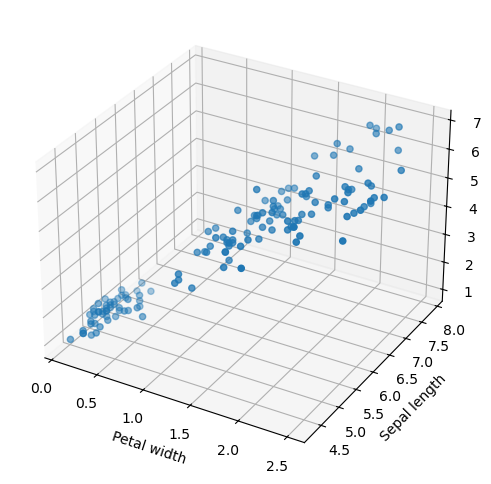

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris.data

fig = plt.figure()
fig.set_size_inches(8,6)
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 3], X[:, 0], X[:, 2])
ax.set_xlabel("Petal width"), ax.set_ylabel("Sepal length"), ax.set_zlabel("Petal length")

plt.show()

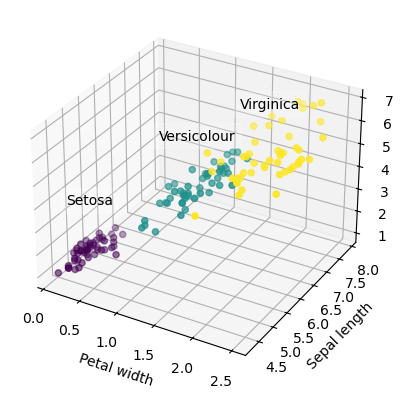

In [2]:
#%matplotlib qt

y = iris.target

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y) #agregamos la etiqueta como si fuera color
ax.set_xlabel("Petal width"), ax.set_ylabel("Sepal length"), ax.set_zlabel("Petal length")

def set_labels(): #funcion para poner nombres dentro del grafico
    for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
        ax.text3D(
            X[y == label, 3].mean(),
            X[y == label, 0].mean(),
            X[y == label, 2].mean() + 2,
            name,
            horizontalalignment="center",
            bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"))
set_labels()
plt.show()

C:\Users\felea\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


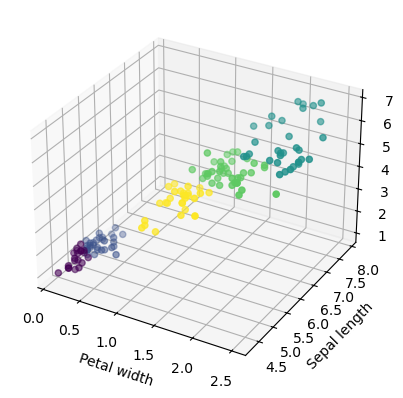

In [5]:
from sklearn.cluster import KMeans

estimator = KMeans(n_clusters=5, n_init=2, init="random", random_state=1)
estimator.fit(X[:, [0, 2, 3]])

labels = estimator.labels_
#print(labels)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(float)) #agregamos la prediccion como si fuera color
ax.set_xlabel("Petal width"), ax.set_ylabel("Sepal length"), ax.set_zlabel("Petal length")

plt.show()

# Agrupamiento espacial basado en densidad de aplicaciones con ruido (DBSCAN)

## Generalidades
El método se basa en agrupar observaciones que están estrechamente cercanas en zonas de alta densidad, dejando afuera a observaciones en zonas de baja densidad.

<center>
    <img src="figures/dbscan-1.png" width="300"/>
</center>

Un grupo satisface las propiedades:
- Todas las observaciones del grupo están conectadas densamente.
- Si una observación es densamente alcanzable desde otra observación del grupo, entonces esa observación también pertenece al grupo.


DBSCAN es determinístico, es decir, siempre encuentra los mismos grupos si es que los datos mantienen el mismo orden.

Si el orden varía, pueden haber diferencias principalmente en los puntos en zonas de baja densidad.

A diferencia de K-means, DBSCAN puede trabajar correctamente con grupos no-convexos.

<br><center>
    <img src="figures/dbscan-kmeans.png" width="600"/>
</center>






## Algoritmo
- Se utilizan dos hiperparámetros: el mínimo de observaciones $P$ y la distancia $\epsilon$.
- Una observación es "núcleo" si al menos $P$ observaciones están a una distancia $\epsilon$ (incluyéndola).
- Una observación es "alcanzable" a una distancia $\epsilon$ desde una observación núcleo.
- Un grupo se forma por observaciones núcleo y observaciones alcanzables.
- Las observaciones no alcanzables son observaciones atípicas o ruido.

<center>
    <img src="figures/dbscan-2.png" width="500"/>
</center>

## DBSCAN en Scikit

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

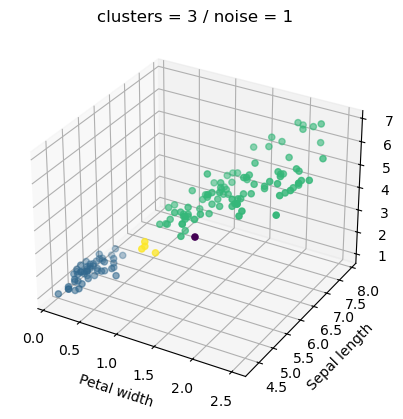

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  2  1  1  2  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1  1
  1  1  2  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


In [11]:
from sklearn.cluster import DBSCAN

estimator = DBSCAN(eps=0.5, min_samples=2)#1-2, 0.5-3

estimator.fit(X[:, [0, 2, 3]])
labels = estimator.labels_

n_clusters = len(set(labels)) - (1 if -1 in labels else 0) #cantidad grupos
n_noise = list(labels).count(-1) #observaciones ruido

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(float))
ax.set_xlabel("Petal width"), ax.set_ylabel("Sepal length"), ax.set_zlabel("Petal length")
ax.set_title('clusters = ' + str(n_clusters) + ' / ' + 'noise = ' + str(n_noise))
#set_labels()
plt.show()
print(labels)

# Comparación entre varios métodos de agrupamiento

<center>
    <img src="figures/clustering-chart-1.png" width="1200"/>
</center>

<center>
    <img src="figures/clustering-chart.png" width="1200"/>
</center>

# Sumario

- Los métodos de agrupamiento permiten identificar patrones o cercanía entre observaciones con el objetivo de asociarlos a una clase, hasta el momento, desconocida
- El método K-means funciona definiendo la cantidad de grupos a encontrar y se basa en las distancias al cuadrado entre los miembros de un grupo
- El método DBSCAN funciona definiendo parámetros de cercanía entre observaciones y se basa en la densidad de los grupos de observaciones